### Load Python Libraries

In [31]:
# Load libraries
import numpy as np
import pandas as pd
import pickle
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasRegressor
%matplotlib inline

### Load the Gastric Cancer Dataset

In [2]:
dataset_full = read_csv("./covariate_genome_freq_table_nonMSI_prefiltered.csv")

In [34]:
dataset = dataset_full.drop(['Unnamed: 0', 'sites.sid'], axis=1)
dataset.tail()

,local_mutrate,mean_rep_time,H3K4Me1_tumor,H3K36me3_E111,H3K4me3_E094,DNase_E094,H3K27me3_E094,H3K9me3_E111,H2BK15ac_meta,H3K4me2_meta,...,H3K23ac_meta,SMC3,threeMer,oneMer,threeRight,threeLeft,fiveRight,fiveLeft,mut.count,nonmut.count
30655595,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,AAC,A,0,AA,0,0,0,1
30655596,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,AAC,A,0,AA,0,0,0,1
30655597,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,AAC,A,0,AA,0,0,0,1
30655598,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,AAC,A,0,AA,0,0,0,1
30655599,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,AAC,A,0,AA,0,0,0,1


In [35]:
# shape
dataset.shape

(30655600, 23)

### Check if NaN exists

In [36]:
dataset.isnull().sum()

local_mutrate    0
mean_rep_time    0
H3K4Me1_tumor    0
H3K36me3_E111    0
H3K4me3_E094     0
DNase_E094       0
H3K27me3_E094    0
H3K9me3_E111     0
H2BK15ac_meta    0
H3K4me2_meta     0
H3K79me1_meta    0
H3T11ph_meta     0
CTCF             0
H3K23ac_meta     0
SMC3             0
threeMer         0
oneMer           0
threeRight       0
threeLeft        0
fiveRight        0
fiveLeft         0
mut.count        0
nonmut.count     0
dtype: int64

There is no NaN feed within the entire data. No preprocessing for NaN is required.

### Convert String values into Integer

In [37]:
# types
dataset.dtypes

local_mutrate    float64
mean_rep_time    float64
H3K4Me1_tumor      int64
H3K36me3_E111      int64
H3K4me3_E094       int64
DNase_E094         int64
H3K27me3_E094      int64
H3K9me3_E111       int64
H2BK15ac_meta      int64
H3K4me2_meta       int64
H3K79me1_meta      int64
H3T11ph_meta       int64
CTCF               int64
H3K23ac_meta       int64
SMC3               int64
threeMer          object
oneMer            object
threeRight        object
threeLeft         object
fiveRight         object
fiveLeft          object
mut.count          int64
nonmut.count       int64
dtype: object

In [39]:
#seed = 7
#numpy.random.seed(seed=seed)
#rand_ix=numpy.random.randint(1, dataset.shape[0], size=10000)
#rand_ix

In [40]:
#dataset_partial = dataset.iloc[rand_ix]
#dataset_partial.tail()

In [41]:
#dataset = dataset_partial

In [42]:
# List up Multiclass string values and its count
obj_cols = ['threeMer', 'oneMer', 'threeRight', 'threeLeft', 'fiveRight', 'fiveLeft']

for i, v in enumerate(obj_cols):
    print(dataset.groupby(v).size())
    print 

threeMer
0      23828674
AAC     2016315
AAG     4810611
dtype: int64
oneMer
0    10176552
A    20479048
dtype: int64
threeRight
0     26124211
GA     4531389
dtype: int64
threeLeft
0     12889365
AA    10582929
CA     4819607
CG     2363699
dtype: int64
fiveRight
0      19572701
AAG     3762750
AGA     3755830
AGT     3564319
dtype: int64
fiveLeft
0      22152823
AAG     2286714
TAA     4042837
TTG     2173226
dtype: int64


In [43]:
dataset_onehot = pd.get_dummies(dataset, prefix=['threeMer', 'oneMer', 'threeRight', 'threeLeft', 'fiveRight', 'fiveLeft'])
dataset_onehot.shape

(30655600, 36)

In [44]:
dataset_onehot.tail()

,local_mutrate,mean_rep_time,H3K4Me1_tumor,H3K36me3_E111,H3K4me3_E094,DNase_E094,H3K27me3_E094,H3K9me3_E111,H2BK15ac_meta,H3K4me2_meta,...,threeLeft_CA,threeLeft_CG,fiveRight_0,fiveRight_AAG,fiveRight_AGA,fiveRight_AGT,fiveLeft_0,fiveLeft_AAG,fiveLeft_TAA,fiveLeft_TTG
30655595,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
30655596,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
30655597,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
30655598,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
30655599,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [45]:
dataset_onehot.isnull().sum()

local_mutrate    0
mean_rep_time    0
H3K4Me1_tumor    0
H3K36me3_E111    0
H3K4me3_E094     0
DNase_E094       0
H3K27me3_E094    0
H3K9me3_E111     0
H2BK15ac_meta    0
H3K4me2_meta     0
H3K79me1_meta    0
H3T11ph_meta     0
CTCF             0
H3K23ac_meta     0
SMC3             0
mut.count        0
nonmut.count     0
threeMer_0       0
threeMer_AAC     0
threeMer_AAG     0
oneMer_0         0
oneMer_A         0
threeRight_0     0
threeRight_GA    0
threeLeft_0      0
threeLeft_AA     0
threeLeft_CA     0
threeLeft_CG     0
fiveRight_0      0
fiveRight_AAG    0
fiveRight_AGA    0
fiveRight_AGT    0
fiveLeft_0       0
fiveLeft_AAG     0
fiveLeft_TAA     0
fiveLeft_TTG     0
dtype: int64

In [46]:
with open('dataset_onehot.pickle', 'wb') as f:
    pickle.dump(dataset_onehot, f)

### Prepare Training and Validation Data

In [47]:
with open('dataset_onehot.pickle', 'rb') as f:
    dataset = pickle.load(f)

In [48]:
dataset.tail()

,local_mutrate,mean_rep_time,H3K4Me1_tumor,H3K36me3_E111,H3K4me3_E094,DNase_E094,H3K27me3_E094,H3K9me3_E111,H2BK15ac_meta,H3K4me2_meta,...,threeLeft_CA,threeLeft_CG,fiveRight_0,fiveRight_AAG,fiveRight_AGA,fiveRight_AGT,fiveLeft_0,fiveLeft_AAG,fiveLeft_TAA,fiveLeft_TTG
30655595,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
30655596,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
30655597,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
30655598,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
30655599,0.000013,57.746571,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [51]:
#dataset_onehot.isnull().sum()

In [53]:
seed = 7
numpy.random.seed(seed=seed)
rand_ix=numpy.random.randint(1, dataset.shape[0], size=1000)

In [54]:
# Split-out validation dataset
dataset = dataset.values
input_dim = dataset.shape[1] - 1

# Use Entire Data
#X = dataset[:, 0:input_dim]
#Y = dataset[:, input_dim]

# Only Partial Data
X = dataset[rand_ix, 0:input_dim]
Y = dataset[rand_ix, input_dim]

validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=7)

In [55]:
# Base model for Feed Forward Neural Network using Keras Regressor
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

LR: -0.000000 (0.000000)
RIDGE: -0.000453 (0.000119)
LASSO: -0.064271 (0.018179)
EN: -0.064271 (0.018178)
KNN: -0.066800 (0.018977)
CART: 0.000000 (0.000000)
SVR: -0.066243 (0.015497)
XGB: -0.000000 (0.000000)
FFNN: -0.013867 (0.005403)


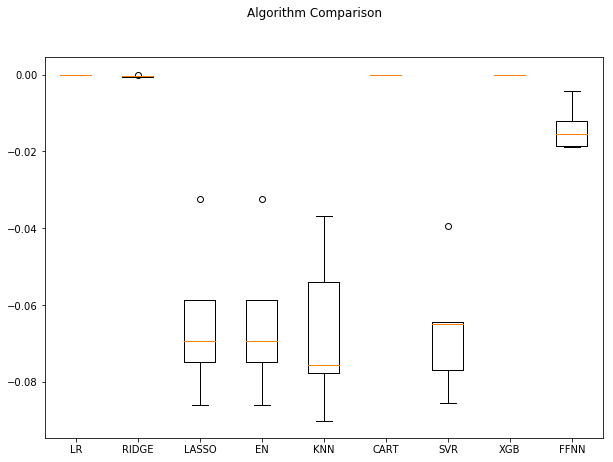

In [56]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'neg_mean_squared_error'

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('RIDGE', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('XGB', XGBRegressor()))
models.append(('FFNN', KerasRegressor(build_fn=baseline_model, epochs=2000, batch_size=1024, verbose=0)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure(figsize=(10, 7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Using Scaled Dataset

ScaledLR: -0.000000 (0.000000)
ScaledRIDGE: -0.000009 (0.000002)
ScaledLASSO: -0.064278 (0.018175)
ScaledEN: -0.064278 (0.018175)
ScaledKNN: -0.020850 (0.006761)
ScaledCART: 0.000000 (0.000000)
ScaledSVR: -0.007417 (0.001495)
ScaledXGB: -0.000000 (0.000000)
ScaledFFNN: -0.000801 (0.000456)


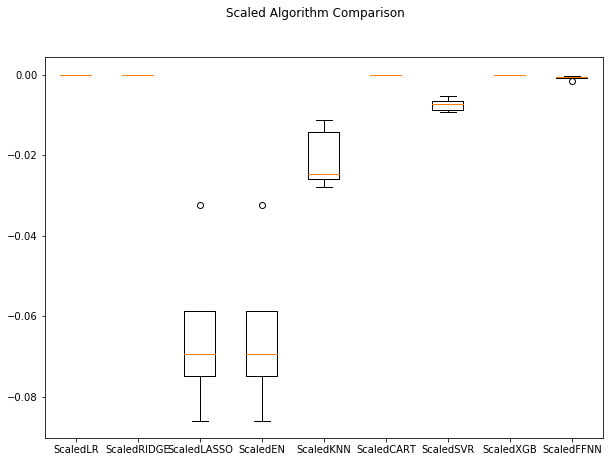

In [57]:
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'neg_mean_squared_error'

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBRegressor())])))
pipelines.append(('ScaledFFNN', Pipeline([('Scaler', StandardScaler()),('FFNN', KerasRegressor(build_fn=baseline_model, epochs=2000, batch_size=1024, verbose=0))])))

results = []
names = []

for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure(figsize=(10, 7))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
def plot_learning_curve(history):    
    print history.history
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model loss - Mean Squared Error(MSE)')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='upper right')
    pyplot.show()

# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

def deep_model():
	# create model
	model = Sequential()
	model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

def deeper_model():
	# create model
	model = Sequential()
	model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(64, kernel_initializer='normal', activation='relu'))
	model.add(Dense(32, kernel_initializer='normal', activation='relu'))
	model.add(Dense(8, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

### Prepare Neural Network Models

In [ ]:
def plot_learning_curve(history):    
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model loss - Mean Squared Error(MSE)')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='upper right')
    pyplot.show()

# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

def more_larger_model():
	# create model
	model = Sequential()
	model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
	model.add(Dense(64, kernel_initializer='normal', activation='relu'))
	model.add(Dense(32, kernel_initializer='normal', activation='relu'))
	model.add(Dense(8, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 3
seed = 7
scoring = 'neg_mean_squared_error'

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('RIDGE', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#models.append(('SVR', SVR()))
models.append(('XGB', XGBRegressor()))
models.append(('FFNN', KerasRegressor(build_fn=baseline_model, epochs=2000, batch_size=1024, verbose=0)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure(figsize=(10, 7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Test options and evaluation metric
num_folds = 3
seed = 7
scoring = 'neg_mean_squared_error'

# Standardize the dataset
pipelines = []
#pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
#pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
#pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
#pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
#pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
#pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
#pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBRegressor())])))
#pipelines.append(('ScaledFFNN', Pipeline([('Scaler', StandardScaler()),('FFNN', KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=256))])))

results = []
names = []

for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure(figsize=(10, 7))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()